In [ ]:
### install requested packages
!pip install contextily

### download necessary data
!rm -rf util && mkdir util
!wget 'https://raw.githubusercontent.com/bz247/TUW_231028/refs/heads/main/util/haversine.py' -O util/haversine.py

!rm -rf data && mkdir data
### download the data.zip file from: https://tuwienacat-my.sharepoint.com/:f:/g/personal/bingyu_zhao_tuwien_ac_at/EkhK2y95nU9Pu7jBNSX6zsEBuMzb1rslbH7gBzFF0UsmvQ?e=Tf5iA8
### upload it to the data folder
!unzip data/data.zip -d data

In [57]:
### import libraries data analysis
import numpy as np
import pandas as pd

### import libraries for plotting
import matplotlib.pyplot as plt

### import libraries for geodata analysis and visualisation
import shapely
import geopandas as gpd
import contextily as ctx
from util import haversine ### user define

### Exercise 1. Descriptive statistics with GPS trajectories
The GPS data are collected from two tram trips in Vienna. Please calculate:
* The total length of each trip
* The time duration of each trip
* The space-mean speed of each trip
* The speed variation of each trip
* The time-mean speed of these two trips when passing through the Franzensbrücke/Donaukanal (lat: 48.213220952644534, lon 16.391347808889147) 

In [17]:
### read and examine the data
gps_trip1 = pd.read_csv('data/GPS/GPS_trip1.csv')
display(gps_trip1.head())

gps_trip2 = pd.read_csv('data/GPS/GPS_trip2.csv')
display(gps_trip2.tail())

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites
0,0.009346,48.217988,16.391613,161.423233,208.561432,NaN,NaN,0.032200,104.000000,25.152908,-1.0
1,0.062871,48.217808,16.391954,161.422024,208.559843,NaN,NaN,0.068391,161.578258,25.152908,-1.0
2,0.615973,48.217794,16.391466,161.567802,208.706380,NaN,NaN,0.091663,35.684899,19.581636,-1.0
3,1.338942,48.217795,16.391780,169.688252,216.826347,5.08,174.023438,0.092956,20.746684,48.000000,-1.0
4,2.339968,48.217783,16.391783,160.666523,207.804623,5.43,174.023438,0.099677,4.702867,4.000000,-1.0


,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites
604,599.840065,48.218271,16.391482,162.408429,209.546605,0.570046,306.972861,1.985339,4.755811,3.347655,-1.0
605,600.840066,48.218272,16.391478,162.313826,209.452007,0.653264,NaN,1.986094,4.751374,3.353950,-1.0
606,601.840068,48.218279,16.391477,161.217455,208.355633,0.354654,357.561597,1.986398,4.756785,3.346271,-1.0
607,602.840071,48.218281,16.391478,160.761028,207.899201,0.000000,359.143505,1.986398,4.768354,3.329765,-1.0
608,603.840072,48.218281,16.391478,160.761028,207.899201,0.000000,359.143505,NaN,4.793676,3.293207,-1.0


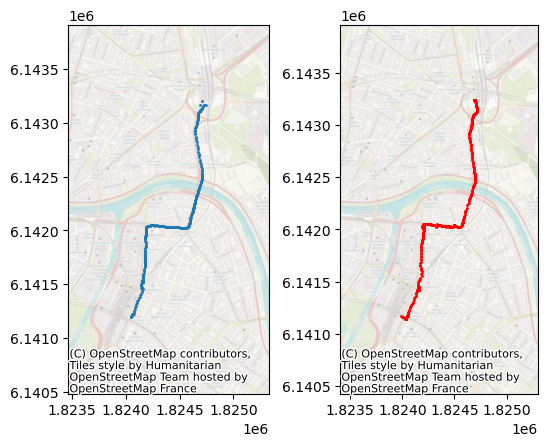

In [38]:
### visualisation 1. plotting the data on a map
fig, ax = plt.subplots(1, 2)

### first trip
gps_trip1 = gpd.GeoDataFrame(gps_trip1, crs='epsg:4326', 
                             geometry=[shapely.geometry.Point(xy) for xy in zip(gps_trip1['Longitude (°)'], gps_trip1['Latitude (°)'])])
gps_trip1 = gps_trip1.to_crs(3857) ### transform coordinate reference system to match the background map
gps_trip1.plot(markersize=1, ax=ax[0])
ax[0].set_xlim([ax[0].get_xlim()[0]*0.9997, ax[0].get_xlim()[1]*1.0003])
ax[0].set_ylim([ax[0].get_ylim()[0]*0.9999, ax[0].get_ylim()[1]*1.0001])
ctx.add_basemap(ax[0], alpha=0.5)

### second trip
gps_trip2 = gpd.GeoDataFrame(gps_trip2, crs='epsg:4326', 
                             geometry=[shapely.geometry.Point(xy) for xy in zip(gps_trip2['Longitude (°)'], gps_trip2['Latitude (°)'])])
gps_trip2 = gps_trip2.to_crs(3857) ### transform coordinate reference system to match the background map
gps_trip2.plot(markersize=1, color='red', ax=ax[1])
ax[1].set_xlim([ax[1].get_xlim()[0]*0.9997, ax[1].get_xlim()[1]*1.0003])
ax[1].set_ylim([ax[1].get_ylim()[0]*0.9999, ax[1].get_ylim()[1]*1.0001])
ctx.add_basemap(ax[1], alpha=0.5)


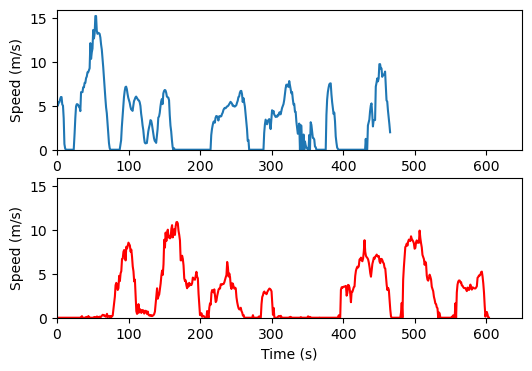

In [43]:
### visualisation 2. plotting the temporal changes of speed
fig, ax = plt.subplots(2, 1, figsize=(6, 4))

### first trip
ax[0].plot(gps_trip1['Time (s)'], gps_trip1['Speed (m/s)'])

### second trip
ax[1].plot(gps_trip2['Time (s)'], gps_trip2['Speed (m/s)'], color='red')

### style
for ax_i in ax:
    ax_i.set_xlim([0, 650])
    ax_i.set_ylim([0, 16])
    ax_i.set_xlabel('Time (s)')
    ax_i.set_ylabel('Speed (m/s)')

In [70]:
# The total length of each trip
trip_1_length = gps_trip1['Distance (km)'].max() - gps_trip1['Distance (km)'].min()
print(f'The length of trip 1 is {trip_1_length:.03f} km')

trip_2_length = gps_trip2['Distance (km)'].max() - gps_trip2['Distance (km)'].min()
print(f'The length of trip 2 is {trip_2_length:.03f} km')
print('\n')

# The time duration of each trip
trip_1_time = gps_trip1['Time (s)'].max() - gps_trip1['Time (s)'].min()
print(f'The length of trip 1 is {trip_1_time:.0f} s')

trip_2_time = gps_trip2['Time (s)'].max() - gps_trip2['Time (s)'].min()
print(f'The length of trip 2 is {trip_2_time:.0f} s')
print('\n')

# The space-mean speed of each trip
trip_1_speed = trip_1_length/(trip_1_time/3600)
trip_1_speed_mean = gps_trip1['Speed (m/s)'].mean() * 3600/1000
print(f'The space-mean speed of trip 1 is {trip_1_speed:.01f} km/h, or {trip_1_speed_mean:.01f} km/h?')

trip_2_speed = trip_2_length/(trip_2_time/3600)
trip_2_speed_mean = gps_trip2['Speed (m/s)'].mean() * 3600/1000
print(f'The space-mean speed of trip 2 is {trip_2_speed:.01f} km/h, or {trip_2_speed_mean:.01f} km/h?')
print('\n')

# The speed variation of each trip
trip_1_speed_variation = gps_trip1['Speed (m/s)'].std() * 3600/1000
print(f'The speed variation of trip 1 is {trip_1_speed_variation:.01f} km/h')

trip_2_speed_variation = gps_trip2['Speed (m/s)'].std() * 3600/1000
print(f'The speed variation of trip 2 is {trip_2_speed_variation:.01f} km/h')
print('\n')

# The time-mean speed of these two trips when passing through the Franzensbrücke/Donaukanal (lat: 48.213220952644534, lon 16.391347808889147)
bridge_lat, bridge_lon = 48.213220952644534, 16.391347808889147
gps_trip1['bridge_distance'] = haversine.haversine(gps_trip1['Latitude (°)'], gps_trip1['Longitude (°)'], bridge_lat, bridge_lon)
gps_trip2['bridge_distance'] = haversine.haversine(gps_trip2['Latitude (°)'], gps_trip2['Longitude (°)'], bridge_lat, bridge_lon)

# display(gps_trip1.loc[gps_trip1['bridge_distance']<10])
# display(gps_trip2.loc[gps_trip2['bridge_distance']<10])

bridge_speed1 = gps_trip1.loc[gps_trip1['bridge_distance'].idxmin(), 'Speed (m/s)']
bridge_speed2 = gps_trip2.loc[gps_trip2['bridge_distance'].idxmin(), 'Speed (m/s)']
bridge_speed_mean = (bridge_speed1 + bridge_speed2)/2
print(f'The time-mean speed of these two trips when passing through the Franzensbrücke/Donaukanal is {bridge_speed_mean:.01f} km/h')
print('\n')

The length of trip 1 is 1.756 km
The length of trip 2 is 1.980 km


The length of trip 1 is 466 s
The length of trip 2 is 604 s


The space-mean speed of trip 1 is 13.6 km/h, or 11.8 km/h?
The space-mean speed of trip 2 is 11.8 km/h, or 9.6 km/h?


The speed variation of trip 1 is 12.1 km/h
The speed variation of trip 2 is 10.8 km/h


The time-mean speed of these two trips when passing through the Franzensbrücke/Donaukanal is 6.3 km/h




### Exercise 2. Multiple regression of subway monthly ticket purchase decisions